<h1>Kelompok 2</h1>

Stroke Prediction Analysis using Prediction Method

ANGGOTA :     



1.   Calvin Lim	2502015762
2.   Michael Vic Chow  2502037454
3.   Kenichi Halim 	2502039163	

## **IMPORT LIBRARY**

In [171]:
#import library
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,precision_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import RocCurveDisplay

import warnings

## **LOAD DATA**

In [2]:
# Load Dataset
!gdown --id 1QSFK0FRh41FAiGWdklgtyePY95xHjopQ -O dataset.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QSFK0FRh41FAiGWdklgtyePY95xHjopQ
To: /content/dataset.csv
100% 317k/317k [00:00<00:00, 96.0MB/s]


## **EXPLORATION DATA ANALYSIS**

In [79]:
df = pd.read_csv("./dataset.csv")
#general information
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
print("Information of dataset: ")
df.info()

Information of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
print("Description of dataset: ")
df.describe()

Description of dataset: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

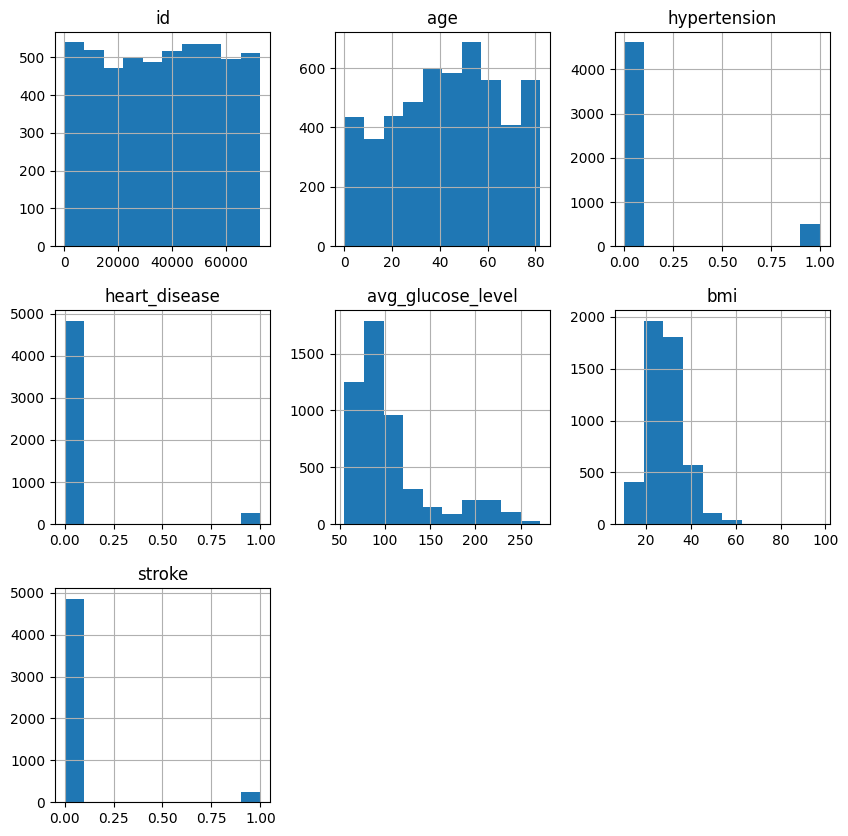

In [82]:
df.hist(figsize = (10,10))

the graph is still incomplete because it didnt include the object type values, so we gonna handle this in pre-processing step

## **PRE-PROCESSING**

<h1>Missing Value Treatment</h1>

In [83]:
#checking if there are any missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [84]:
# fill bmi with MEAN of the parameter
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [85]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [86]:
#we wanna see the unique values of the categorical value
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].value_counts()}\n')

-------------------------------
Column name: gender

Unique values:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

-------------------------------
Column name: ever_married

Unique values:
Yes    3353
No     1757
Name: ever_married, dtype: int64

-------------------------------
Column name: work_type

Unique values:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

-------------------------------
Column name: Residence_type

Unique values:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

-------------------------------
Column name: smoking_status

Unique values:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



<h1>Feature Selection</h1>

In [87]:
#Here We gonna try to replace gender value of Other to mode
df['gender'].mode()

0    Female
Name: gender, dtype: object

In [88]:
#checking whose row has "Other" gender
df[df['gender'] == 'Other'].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [89]:
# replace unknown value
df['gender'] = df['gender'].replace('Other', 'Female')
df.loc[3116]
#data other successfully been replaced

id                             56156
gender                        Female
age                             26.0
hypertension                       0
heart_disease                      0
ever_married                      No
work_type                    Private
Residence_type                 Rural
avg_glucose_level             143.33
bmi                             22.4
smoking_status       formerly smoked
stroke                             0
Name: 3116, dtype: object

In [90]:
df['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

gender Other sudah Selesai di treat

<Axes: >

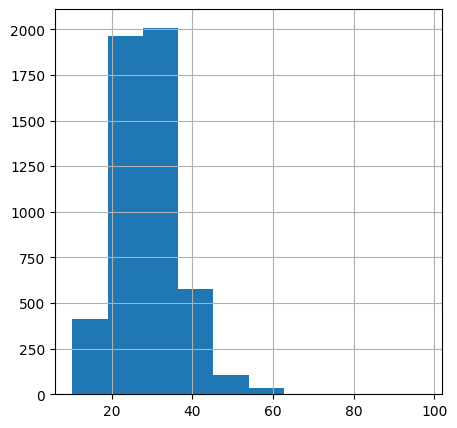

In [91]:
df['bmi'].hist(figsize=(5,5))

untuk mempermudah menganalisa data kita dapat membuat kategori obesitas menggunakan data BMi

In [92]:
#create BMI obese category
pe_condition = [
    #underweight
    (df['bmi'] < 18.5),
    #Healthy
    ((df['bmi'] >= 18.5) & (df['bmi'] < 25)),
    #OverWeight
    ((df['bmi'] >= 25) & (df['bmi'] < 30)),
    #Obeese
    (df['bmi'] >= 30)
]
category= [ 0, 1, 2, 3]
df['obesity'] = np.select(pe_condition, category)
#drop bmi because we dont need it anymore
# df.drop(columns=["bmi"], inplace=True)

In [93]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obesity
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1


<h1>Encoder</h1>

**Mengubah Category menjadi parameter angka**




In [101]:
#encode category to int

#copy df so you dont repeat
df2 = df.copy()
#create object named encoder
encoder = LabelEncoder()

#create categorical list
categorical_data= df.select_dtypes('O').columns

#loop and change category data to numeric
for column in categorical_data:
  df2[column] = encoder.fit_transform(df2[column])

df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obesity
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,3
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,1


In [95]:
for col in categorical_data:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df2[col].value_counts()}\n')

-------------------------------
Column name: gender

Unique values:
0    2995
1    2115
Name: gender, dtype: int64

-------------------------------
Column name: ever_married

Unique values:
1    3353
0    1757
Name: ever_married, dtype: int64

-------------------------------
Column name: work_type

Unique values:
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

-------------------------------
Column name: Residence_type

Unique values:
1    2596
0    2514
Name: Residence_type, dtype: int64

-------------------------------
Column name: smoking_status

Unique values:
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64



Note 

**Gender:**

Female = 0 |
Male = 1

**ever_married :**

no = 0 |
yes = 1

**work_type :**

Govt_job      =   0 |
Never_worked  =   1 |
Private       =   2 |
Self-employed =   3 |
children      =   4 

**Residence_type :**

Rural = 0 |
Urban = 1

**smoking_status :** 

Unknown          =  0 |
formerly smoked  =  1 |
never smoked     =  2 |
smokes           =  3 

**Obesity :**

Underweight = 0 |
Healthy     = 1 |
OverWeight  = 2 |
Obeese      = 3

#<h1>Visualization after preprocessing</h1>

In [102]:
df2.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obesity
id,1.000000,0.001776,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388,0.015395
gender,0.001776,1.000000,-0.027623,0.021275,0.085717,-0.029936,0.056597,-0.005937,0.054580,-0.025464,-0.062360,0.009117,0.021042
age,0.003538,-0.027623,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257,0.424798
hypertension,0.003550,0.021275,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904,0.152191
heart_disease,-0.001296,0.085717,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914,0.080016
ever_married,0.013690,-0.029936,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340,0.397297
work_type,-0.015757,0.056597,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316,-0.348193
Residence_type,-0.001403,-0.005937,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458,-0.007301
avg_glucose_level,0.001092,0.054580,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945,0.163457
bmi,0.002999,-0.025464,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947,0.843518


<Axes: >

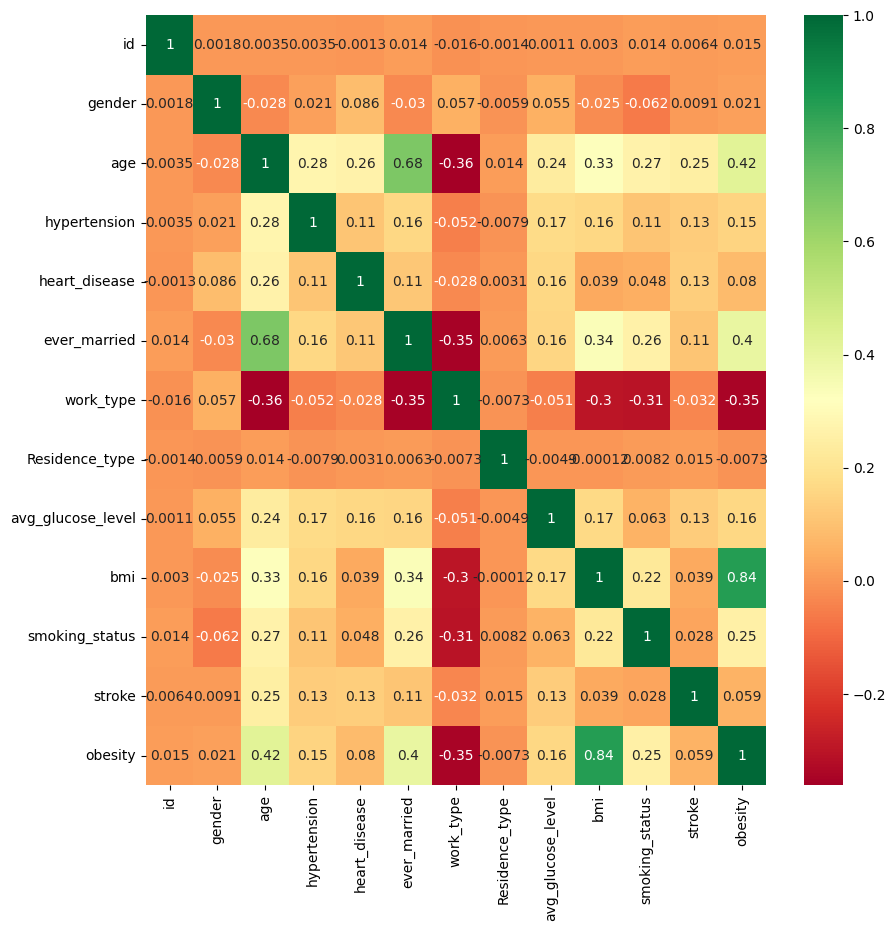

In [103]:
#HEAT MAP
corrmat = df2.corr()
top_cor_features = corrmat.index
plt.figure(figsize = (10, 10))

sns.heatmap(df2[top_cor_features].corr(), annot= True, cmap="RdYlGn")

dropping low corr

In [104]:
df2.drop(columns=["id","gender", "bmi","work_type","gender", "smoking_status","Residence_type"], inplace=True)

In [105]:
df2.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke,obesity
0,67.0,0,1,1,228.69,1,3
1,61.0,0,0,1,202.21,1,2
2,80.0,0,1,1,105.92,1,3
3,49.0,0,0,1,171.23,1,3
4,79.0,1,0,1,174.12,1,1


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'obesity'}>, <Axes: >, <Axes: >]],
      dtype=object)

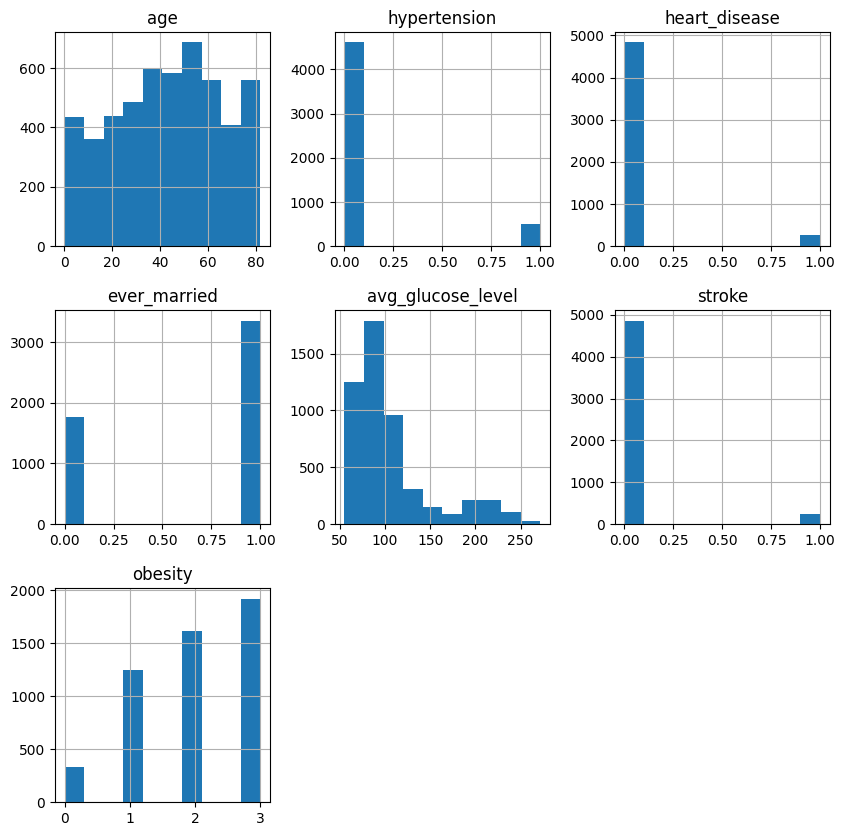

In [106]:
df2.hist(figsize = (10,10))

#<h1>Data Training</h1>

pemisahan data X dan Y

In [107]:
X = df2.drop('stroke', axis=1)
y = df2['stroke']
print("Shape untuk X | Shape untuk Y")
X.shape, y.shape

Shape untuk X | Shape untuk Y


((5110, 6), (5110,))

In [108]:
np.random.seed(60)

#split data training and testing with 3 : 1 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45) 
print("size of dataset:",df2.shape)
print("size of X_train data:", X_train.shape)
print("size of X_test data :", X_test.shape)
print("size of y_train data:", y_train.shape)
print("size of y_test data :", y_test.shape)


size of dataset: (5110, 7)
size of X_train data: (3832, 6)
size of X_test data : (1278, 6)
size of y_train data: (3832,)
size of y_test data : (1278,)


<Axes: >

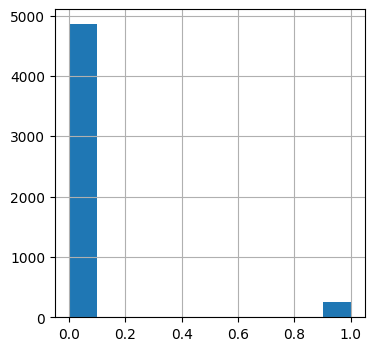

In [109]:
df2['stroke'].hist(figsize = (4,4))

karena dataset stroke tidak dibagi dengan seimbang maka kita pakai metode SMOTE untuk membuat dataset jadi seimbang

<h1>Balancing Dataset</h1>

In [110]:
from imblearn.over_sampling import SMOTE
#Fix unbalanced data on non-stroke
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [111]:
print("size of X_train data:", X_train_resh.shape)
print("size of X_test data :", y_train_resh.shape)

size of X_train data: (7288, 6)
size of X_test data : (7288,)


# **DATA MODELING**

<h1>Model</h1>

In [112]:
LS_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LS',LinearSVC(random_state=4))])
KNN_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier())])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=45))])
NB_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NB',GaussianNB())])

In [113]:
LS_pipeline.fit(X_train_resh,y_train_resh)
KNN_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)
NB_pipeline.fit(X_train_resh,y_train_resh)

LS_pred = LS_pipeline.predict(X_test)
KNN_pred = KNN_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
NB_pred = NB_pipeline.predict(X_test)

LS_cm = confusion_matrix(y_test, LS_pred)
KNN_cm = confusion_matrix(y_test, KNN_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)
NB_cm = confusion_matrix(y_test, NB_pred)

<h1>Linear SVC</h1>

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1217
           1       0.13      0.72      0.22        61

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.54      1278
weighted avg       0.94      0.76      0.83      1278

LinearSVC Score Accuracy:  0.7566510172143975


<Axes: >

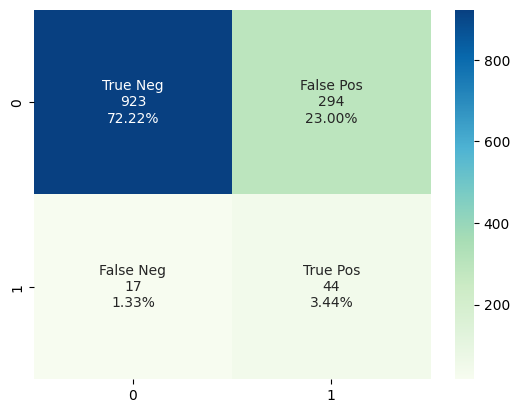

In [173]:
# Scoring it to make sure it matches above

print(classification_report(y_test, LS_pred))
print("LinearSVC Score Accuracy: ",LS_pipeline.score(X_test,y_test))

cm = confusion_matrix(y_test, LS_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:0.2f}%".format(value) for value in (cm.flatten()/np.sum(cm))*100]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='GnBu')

<h1>Logistic Regression</h1>

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1217
           1       0.13      0.72      0.23        61

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.54      1278
weighted avg       0.94      0.76      0.83      1278

Logistic Regression Score Accuracy:  0.7629107981220657


<Axes: >

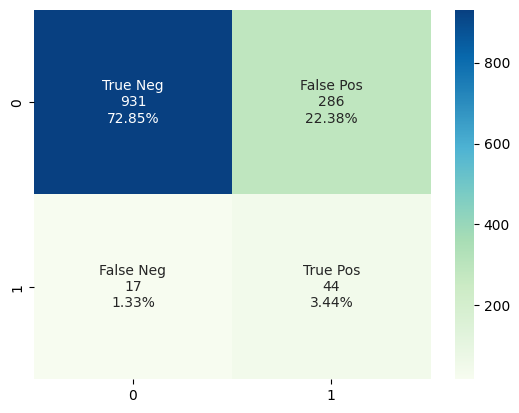

In [174]:
# Scoring it to make sure it matches above

print(classification_report(y_test, logreg_pred))
print("Logistic Regression Score Accuracy: ",logreg_pipeline.score(X_test,y_test))

cm = confusion_matrix(y_test, logreg_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:0.2f}%".format(value) for value in (cm.flatten()/np.sum(cm))*100]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='GnBu')

<h1>KNeighbour</h1>

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1217
           1       0.13      0.49      0.20        61

    accuracy                           0.81      1278
   macro avg       0.55      0.66      0.55      1278
weighted avg       0.93      0.81      0.86      1278

KNeighbour Score Accuracy:  0.8137715179968701


<Axes: >

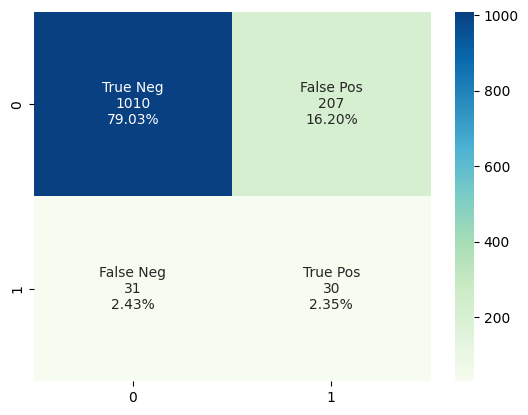

In [175]:
# Scoring it to make sure it matches above

print(classification_report(y_test, KNN_pred))
print("KNeighbour Score Accuracy: ",KNN_pipeline.score(X_test,y_test))

cm = confusion_matrix(y_test, KNN_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:0.2f}%".format(value) for value in (cm.flatten()/np.sum(cm))*100]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='GnBu')

<h1>Gaussian Naive Bayes</h1>

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1217
           1       0.12      0.84      0.21        61

    accuracy                           0.71      1278
   macro avg       0.56      0.77      0.52      1278
weighted avg       0.95      0.71      0.79      1278

Gaussian Naive Bayes Score Accuracy:  0.7065727699530516


<Axes: >

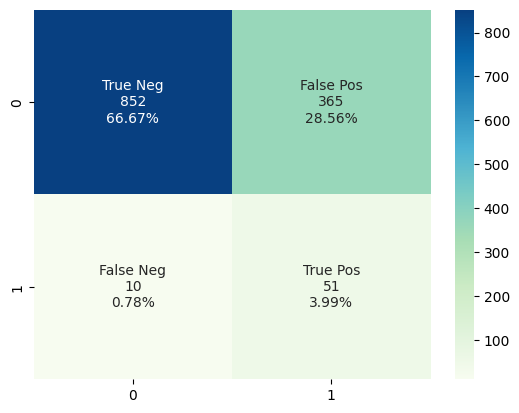

In [176]:
# Scoring it to make sure it matches above
print(classification_report(y_test, NB_pred))
print("Gaussian Naive Bayes Score Accuracy: ",NB_pipeline.score(X_test,y_test))

cm = confusion_matrix(y_test, NB_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:0.2f}%".format(value) for value in (cm.flatten()/np.sum(cm))*100]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='GnBu')

# Evaluation

In [166]:
LS_df = pd.DataFrame(data=[f1_score(y_test,LS_pred),accuracy_score(y_test, LS_pred), recall_score(y_test, LS_pred),
                   precision_score(y_test, LS_pred), roc_auc_score(y_test, LS_pred)], 
             columns=['Linear SVC Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

KNN_df = pd.DataFrame(data=[f1_score(y_test,KNN_pred),accuracy_score(y_test, KNN_pred), recall_score(y_test, KNN_pred),
                   precision_score(y_test, KNN_pred), roc_auc_score(y_test, KNN_pred)], 
             columns=['KNN  Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_pred),accuracy_score(y_test, logreg_pred), recall_score(y_test, logreg_pred),
                   precision_score(y_test, logreg_pred), roc_auc_score(y_test, logreg_pred)], 
             columns=['Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
NB_df = pd.DataFrame(data=[f1_score(y_test,NB_pred),accuracy_score(y_test, NB_pred), recall_score(y_test, NB_pred),
                   precision_score(y_test, NB_pred), roc_auc_score(y_test, NB_pred)], 
             columns=['GaussianNB Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

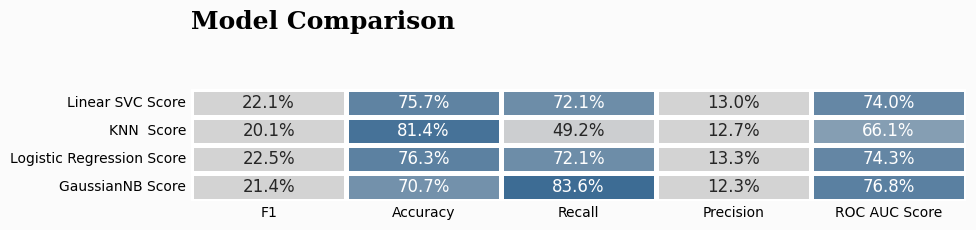

In [167]:
df_models = round(pd.concat([LS_df,KNN_df,lr_df, NB_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)